# **Esercizio Numpy-Pandas-Matplotlib**

L'obiettivo di questo esercizio è generare un set di dati di serie temporali utilizzando NumPy, analizzarli con pandas e visualizzare i risultati usando Matplotlib.

1. **Generazione dei Dati**: Utilizzare NumPy per generare una serie temporale di 365 giorni di dati, simulando il numero di visitatori giornalieri in ospedale. Assumere che il numero medio di visitatori sia 1200 con una deviazione standard di 900. Inoltre, aggiungere un trend decrescente nel tempo per simulare l'aumento della popolarità dell'ospedale.

In [7]:
import numpy as np
from scipy.stats import truncnorm

In [30]:
visitatori = truncnorm.rvs((300-1200)/900, (10000-1200)/900, loc=1200, scale=900, size=305, random_state=True)
visitatori=visitatori.astype(int)

In [31]:
visitatori

array([1221, 1849,  300, 1002,  681,  553,  767, 1085, 1183, 1456, 1225,
       1765,  805, 2340,  381, 1731, 1222, 1495,  666,  792, 2067, 2938,
       1023, 1782, 2333, 2414,  535,  414,  732, 2340,  568, 1229, 2825,
       1444, 1781, 1027, 1768, 2175,  355, 1925, 3315, 1919,  959, 2033,
        580, 1280, 2483,  985,  973,  643,  358, 1750,  820,  929, 1363,
        453, 1526,  681, 1557, 1799,  578, 1215, 1787, 1216,  444, 1450,
       1716, 1409, 2710, 1552, 2456,  660,  664, 2087, 1184,  722, 2591,
       1089, 1926, 1863, 2362, 1629, 1927, 1091,  938, 2420, 1242, 2898,
       1716, 1625,  607, 2750, 1284, 1535, 1204,  872, 2456, 1525,  308,
       1615, 1049, 1432, 2374, 1107, 2483, 1628,  348, 2604, 1778, 3756,
        737,  659, 2624, 1792,  487, 1939, 1934, 2564, 1827,  629,  360,
        378,  384,  891, 2267, 1456, 1483, 2201,  629,  956, 1550, 2955,
       1500,  356, 2066,  864, 2086, 1166, 2281, 1917, 1490,  657,  471,
        623,  430,  590,  849, 1831, 1497,  338,  5

2. **Creazione del DataFrame**: Creare un DataFrame pandas con le date come indice e il numero di visitatori come colonna e una collonna casuale della patologia scelta fra 3 (ossa, cuore, testa).

In [13]:
import pandas as pd
import random

In [32]:
date_range = pd.date_range('2023-01-01', '2023-12-31')
date_selezionate = np.random.choice(date_range, size=305, replace=False)
date = np.sort(date_selezionate)

In [33]:
base_patologia=['ossa','cuore','testa']
patologia = random.choices(base_patologia, k=305)

In [34]:
dataset ={
    'Data': date,
    'Visitatori': visitatori,
    'Patologia':patologia
}

In [35]:
df=pd.DataFrame(dataset)

In [36]:
df.head()

,Data,Visitatori,Patologia
0,2023-01-01,1221,cuore
1,2023-01-02,1849,ossa
2,2023-01-03,300,ossa
3,2023-01-04,1002,ossa
4,2023-01-05,681,ossa


3. Analisi dei Dati: Calcolare il numero medio di visitatori per mese e la
deviazione standard e quale patologia è più e quale meno trovata.

In [40]:
media_mensile = df.groupby(df['Data'].dt.month)['Visitatori'].mean()
print(media_mensile)

Data
1     1306.480000
2     1502.458333
3     1264.000000
4     1643.181818
5     1477.689655
6     1342.600000
7     1423.851852
8     1543.928571
9     1532.653846
10    1594.444444
11    1555.500000
12    1573.640000
Name: Visitatori, dtype: float64


In [41]:
std_mensile = df.groupby(df['Data'].dt.month)['Visitatori'].std()
print(std_mensile)

Data
1     665.685932
2     826.583065
3     633.922063
4     680.778520
5     896.121010
6     716.618215
7     780.352223
8     760.233050
9     791.223101
10    733.510806
11    518.834731
12    672.988539
Name: Visitatori, dtype: float64


In [42]:
frequenza_patologie = df['Patologia'].value_counts()
print(frequenza_patologie)

Patologia
cuore    105
testa    101
ossa      99
Name: count, dtype: int64


4. Visualizzazione dei Dati: creare un grafico a linee del numero di visitatori giornalieri. Aggiungere al grafico la media mobile a 7 giorni per mostrare la tendenza settimanale. Creare un secondo grafico che mostri la media mensile dei visitatori. creare un grafico che mostri la divisione fra le 3 patologie.

In [44]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Numero di Visitatori')

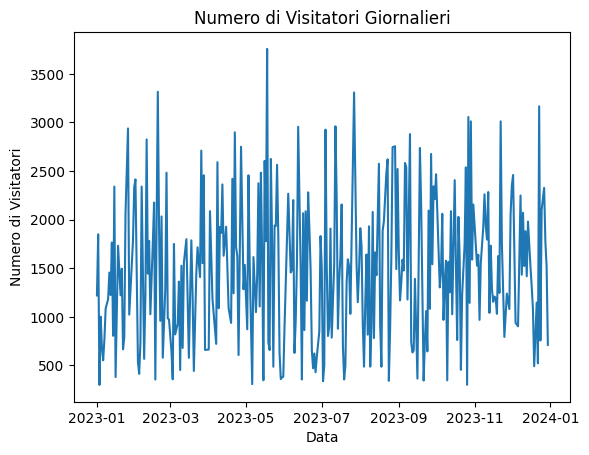

In [56]:
plt.plot(df['Data'], df['Visitatori'])
plt.title('Numero di Visitatori Giornalieri')
plt.xlabel('Data')
plt.ylabel('Numero di Visitatori')

In [45]:
df['MediaMobile7Giorni'] = df['Visitatori'].rolling(window=7).mean()

Text(0, 0.5, 'Numero di Visitatori')

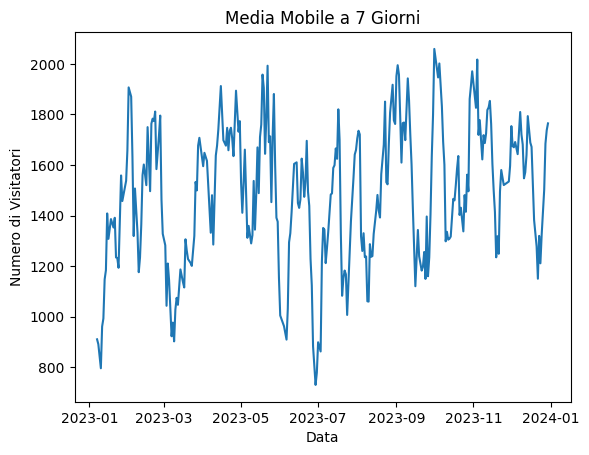

In [57]:
plt.plot(df['Data'], df['MediaMobile7Giorni'])
plt.title('Media Mobile a 7 Giorni')
plt.xlabel('Data')
plt.ylabel('Numero di Visitatori')

Text(0, 0.5, 'Numero Medio di Visitatori')

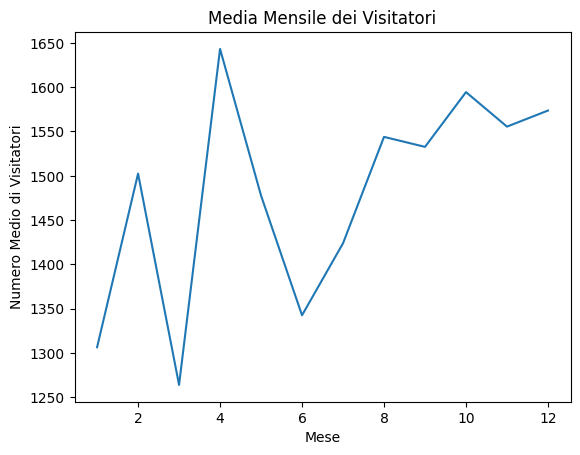

In [52]:
plt.plot(media_mensile.index, media_mensile)
plt.title('Media Mensile dei Visitatori')
plt.xlabel('Mese')
plt.ylabel('Numero Medio di Visitatori')

Text(0, 0.5, 'Frequenza')

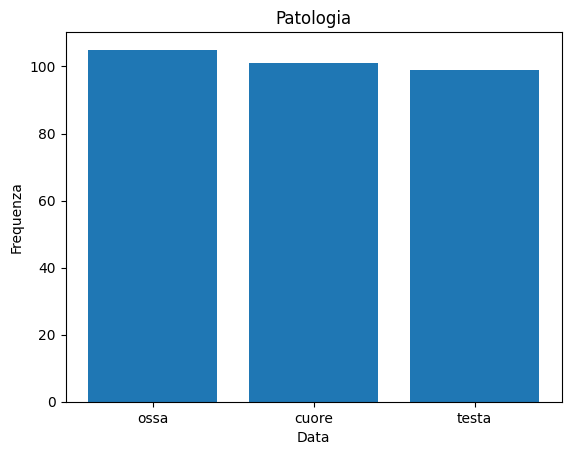

In [55]:
plt.bar(base_patologia, df['Patologia'].value_counts())
plt.title('Patologia')
plt.xlabel('Data')
plt.ylabel('Frequenza')